# Sample Data Generation

This notebook generates sample data to test the neural network. The data generated is meant for classification (classes 0 and 1) based on a 2D feature vector.

In [25]:
# dependencies
import numpy as np
from dataclasses import dataclass
from matplotlib import pyplot as plt
import csv

In [33]:
# define class means and variances
@dataclass
class NormalClass:
    mean: np.array
    covariance: np.array

data = [
    NormalClass(np.array([2, 4]),
                np.array([[4, 3],
                          [3, 5]])),
    NormalClass(np.array([5, 10]),
                np.array([[4, 0],
                          [0, 9]]))
]

In [34]:
# generate samples
num_samples = 50

samples = []
for i, c in enumerate(data):
    y = i
    for _ in range(num_samples):
        x = np.random.multivariate_normal(c.mean, c.covariance)
        sample = np.append(x, y)
        samples.append(sample)
samples = np.array(samples)

(100, 3)


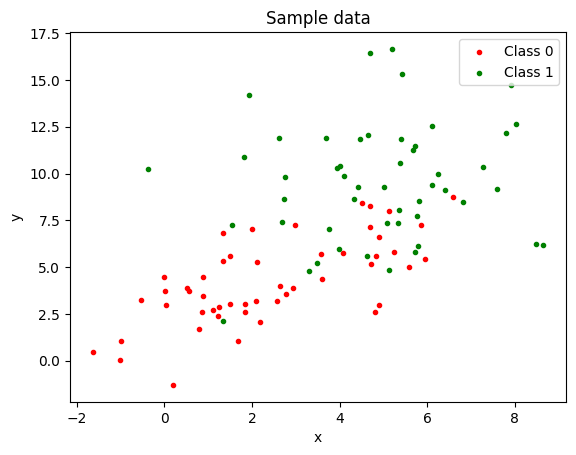

In [35]:
# visualize
colors = ["r", "g", "b"]
print(samples.shape)
for i in range(len(data)):
    sample_subset = samples[50*i:50*(i+1)]
    plt.scatter(sample_subset[:, 0], sample_subset[:, 1], marker=".", color=colors[i], label=f"Class {i}")
plt.legend()
plt.title("Sample data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [27]:
# shuffle data and export
np.random.shuffle(samples)

with open("data.csv", "w", newline="") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerows(samples)